In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The breast cancer data set has 569 samples with 30 parameters. The samples are classified into two classes, either the tumor is malignant or benign.

In [2]:
from sklearn import datasets
X, y = datasets.load_breast_cancer(return_X_y=True)
# y:[0, 1] = ['malignant', 'benign']

In [3]:
# Make y in (-1, 1)
y = y*2-1

------------------

## My Logistic Regression

In [5]:
import os
import sys

# Add the working directory to the path to import local modules
sys.path.insert(0, os.getcwd())
# Import MY Logistic Regression Model
import myLogisticRegression

In [6]:
X_test, y_test, X_train, y_train = myLogisticRegression.split_data_set(X, y, split = 0.2)
X_train, X_test = myLogisticRegression.standardize_data(X_train, X_test)

In [7]:
lambda_ = 1.
my_model = myLogisticRegression.LogisticRegression(lambda_)
my_model.fit(X_train, y_train)
my_model.coef_

array([-0.08113581, -0.05135443, -0.0817788 , -0.07713021, -0.03700612,
       -0.0586525 , -0.06993336, -0.08396965, -0.03330156,  0.01440655,
       -0.06071753,  0.00250271, -0.05764972, -0.0560863 ,  0.01435965,
       -0.01498599, -0.00627036, -0.03046305,  0.00528767,  0.00980066,
       -0.08790821, -0.05865554, -0.08744437, -0.0808492 , -0.04984763,
       -0.06272309, -0.06873278, -0.08810804, -0.05071943, -0.03091308])

In [8]:
test_predictions = my_model.predict(X_test)

In [9]:
my_model.score(X_train, y_train)
my_model.score(X_test, y_test)

0.9560439560439561

0.9210526315789473

`myLogisiticRegression` model demonstrates a 95.6% accuracy on the training set and a 92.1% accuracy on the test set.

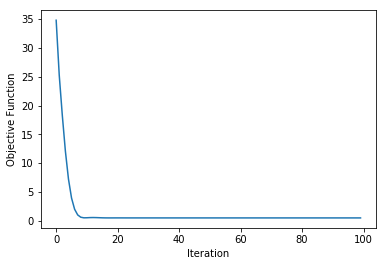

In [10]:
fig = my_model.plot_learning(X_train, y_train)

## Sklearn Logistic Regression

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
n, d = X_train.shape
regularizationFactor = 1/(2*n*lambda_)
sklearn_model = LogisticRegression(C = regularizationFactor, 
                                   fit_intercept=False, 
                                   solver='lbfgs', 
                                   penalty='l2', 
                                   tol=10e-8)

In [15]:
_ = sklearn_model.fit(X_train, y_train)
sklearn_model.coef_
sklearn_model.score(X_train, y_train)
sklearn_model.score(X_test, y_test)

array([[-0.0811359 , -0.05135712, -0.08177906, -0.07713123, -0.03700806,
        -0.05865398, -0.06993285, -0.08396892, -0.03330439,  0.0144059 ,
        -0.06071669,  0.00250377, -0.05764996, -0.0560876 ,  0.01435863,
        -0.01498644, -0.00627153, -0.03046372,  0.00528914,  0.00980204,
        -0.08790755, -0.05865766, -0.08744438, -0.08084989, -0.0498479 ,
        -0.06272328, -0.06873241, -0.08810706, -0.05071905, -0.03091182]])

0.9560439560439561

0.9210526315789473

`sklearn.LogisiticRegression` model has identical accuracy as `myLogisiticRegression`. Further, the coefficient estimates are identical.

In [16]:
print('beta comparison: \n')
print('sklearn  |  my algorithm')
print('------------------------')
for i,j in zip(sklearn_model.coef_.reshape(d), my_model.coef_):
    print(round(i,5), " | ",round(j,5))

beta comparison: 

sklearn  |  my algorithm
------------------------
-0.08114  |  -0.08114
-0.05136  |  -0.05135
-0.08178  |  -0.08178
-0.07713  |  -0.07713
-0.03701  |  -0.03701
-0.05865  |  -0.05865
-0.06993  |  -0.06993
-0.08397  |  -0.08397
-0.0333  |  -0.0333
0.01441  |  0.01441
-0.06072  |  -0.06072
0.0025  |  0.0025
-0.05765  |  -0.05765
-0.05609  |  -0.05609
0.01436  |  0.01436
-0.01499  |  -0.01499
-0.00627  |  -0.00627
-0.03046  |  -0.03046
0.00529  |  0.00529
0.0098  |  0.0098
-0.08791  |  -0.08791
-0.05866  |  -0.05866
-0.08744  |  -0.08744
-0.08085  |  -0.08085
-0.04985  |  -0.04985
-0.06272  |  -0.06272
-0.06873  |  -0.06873
-0.08811  |  -0.08811
-0.05072  |  -0.05072
-0.03091  |  -0.03091


-------------------------

------------------

## My Logistic Regression with Cross-Validation

In [17]:
my_modelCV = myLogisticRegression.LogisticRegressionCV(cv=5)
my_modelCV.fit(X_train, y_train)

In [18]:
print('MY MODEL Cross-validation model coefficients')
my_modelCV.coef_

MY MODEL Cross-validation model coefficients


array([-0.35446704, -0.39518114, -0.33666401, -0.43469332, -0.14614101,
        0.06412665, -0.45497638, -0.54048151, -0.21644433,  0.15753565,
       -0.7737284 , -0.02066209, -0.61179327, -0.62680813,  0.06604328,
        0.32684779,  0.10800607,  0.01230812,  0.07691034,  0.34241396,
       -0.62292005, -0.60356333, -0.57636314, -0.66265417, -0.42037065,
       -0.14967287, -0.46882443, -0.57830745, -0.38798093, -0.25879455])

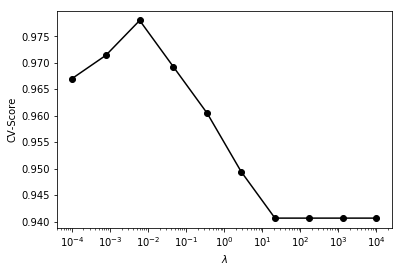

In [21]:
_ = my_modelCV.plot_cv_scores()

In [22]:
print('MY MODEL optimal parameters:')
print('  lambda: {}'.format(round(my_modelCV.lambda_,5)))
print('  C: {}'.format(round(my_modelCV.C_, 5)))

MY MODEL optimal parameters:
  lambda: 0.00599
  C: 0.18331


In [23]:
my_modelCV.score(X_train, y_train)
my_modelCV.score(X_test, y_test)

0.989010989010989

0.956140350877193

My cross-validation model obtains a 98.9% accuracy on the training set and a 95.6% accuracy on the test set. The accuracy is improved by about 3% for both sets compared to the using $\lambda = 1$.

------------------

## Sklearn Logistic Regression with Cross-Validation

In [24]:
from sklearn.linear_model import LogisticRegressionCV

In [25]:
sklearn_modelCV = LogisticRegressionCV(cv=5, fit_intercept=False, max_iter=1000)
_ = sklearn_modelCV.fit(X_train, y_train)
sklearn_modelCV.score(X_train, y_train)
sklearn_modelCV.score(X_test, y_test)

0.989010989010989

0.9649122807017544

The `sklearn.LogisticRegressionCV` obtains indentical accuracies as my cross-validation model (98.9% and 96.5% accuracy for the training and test datasets, respectively).

In [26]:
print('SKLEARN Cross-validation model coefficients')
sklearn_modelCV.coef_

SKLEARN Cross-validation model coefficients


array([[-0.33907339, -0.43975489, -0.33471766, -0.45524439, -0.1504753 ,
         0.19016279, -0.56078098, -0.6516716 , -0.26337983,  0.15780683,
        -0.99749909, -0.00173753, -0.74490811, -0.80419886,  0.11190058,
         0.47322561,  0.11126508, -0.02019339,  0.09990156,  0.4768656 ,
        -0.73232394, -0.74696146, -0.65991939, -0.79704759, -0.47888748,
        -0.09941796, -0.59920777, -0.71874421, -0.44888533, -0.36470289]])

In [27]:
n, d = X_train.shape
lambda_star = 1/(2*n*sklearn_modelCV.C_)
print('SKLEARN optimal parameters:')
print('  lambda: {}'.format(round(lambda_star[0],5)))
print('  C: {}'.format(round(sklearn_modelCV.C_[0], 5)))

SKLEARN optimal parameters:
  lambda: 0.00306
  C: 0.35938


The model coefficients and optimal values of $\lambda$ (0.00599 vs. 0.00306 for mine and sklearn) are very similar. This demonstrates that my models have very good accuracy and have been implemented correctly.